In [7]:
import stock_data as sd
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
apple_price =sd.Trading('AAPL').stock_price('2023-01-18')

In [4]:
apple_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-17 00:00:00-05:00,232.119995,232.289993,228.479996,229.979996,68247100,0.0,0.0
2025-01-16 00:00:00-05:00,237.350006,238.009995,228.029999,228.259995,71759100,0.0,0.0
2025-01-15 00:00:00-05:00,234.639999,238.960007,234.429993,237.869995,39832000,0.0,0.0
2025-01-14 00:00:00-05:00,234.750000,236.119995,232.470001,233.279999,39435300,0.0,0.0
2025-01-13 00:00:00-05:00,233.529999,234.669998,229.720001,234.399994,49630700,0.0,0.0


In [10]:
apple_price.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.998341,0.998740,0.997034,-0.187366,-0.016805,NaN
High,0.998341,1.000000,0.998333,0.998781,-0.165142,-0.017552,NaN
Low,0.998740,0.998333,1.000000,0.998689,-0.196110,-0.014949,NaN
Close,0.997034,0.998781,0.998689,1.000000,-0.182171,-0.016286,NaN
Volume,-0.187366,-0.165142,-0.196110,-0.182171,1.000000,-0.043737,NaN
Dividends,-0.016805,-0.017552,-0.014949,-0.016286,-0.043737,1.000000,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='Date', ylabel='Open'>

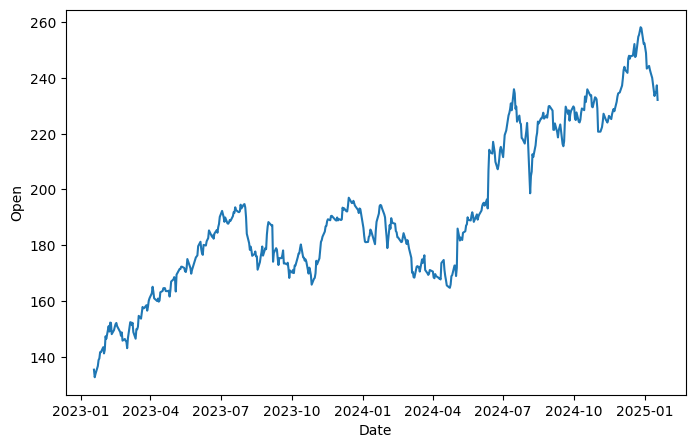

In [13]:

plt.figure(figsize=[8,5], dpi=100)
sn.lineplot(data=apple_price, x=apple_price.index, y='Open')

<AxesSubplot: xlabel='Date', ylabel='Open'>

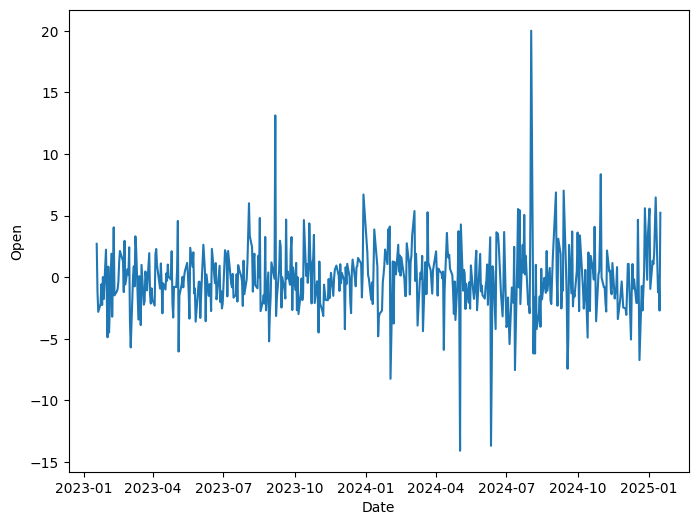

In [19]:
#First differencing prices
apple_price_dif = apple_price.Open.diff()

plt.figure(figsize=[8,6], dpi=100)
sn.lineplot(data=apple_price_dif)


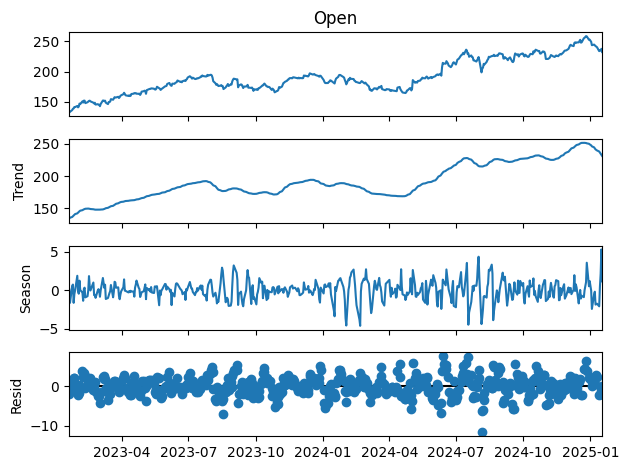

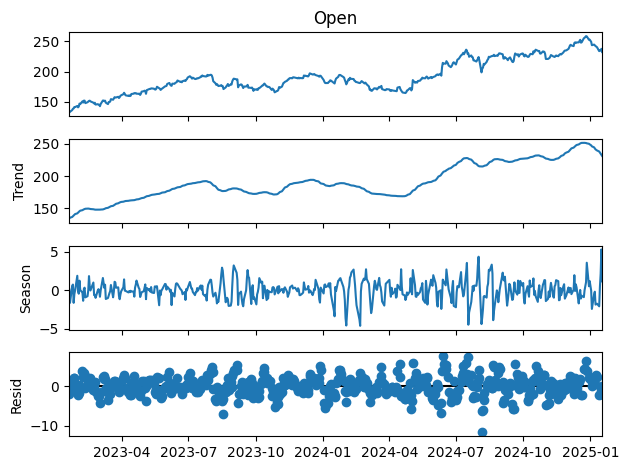

In [50]:
from statsmodels.tsa.seasonal import STL
price = apple_price['Open'].reset_index()
price['Date'] = price['Date'].dt.strftime('%Y-%m-%d')
price['Date'] = pd.to_datetime(price['Date'])
price = price.set_index('Date').sort_index(ascending=True)



res = STL(price['Open'], period=12).fit()
res.plot()

In [41]:
price

,Open
Date,
2025-01-17,232.119995
2025-01-16,237.350006
2025-01-15,234.639999
2025-01-14,234.750000
2025-01-13,233.529999
...,...
2023-01-24,138.849854
2023-01-23,136.682621
2023-01-20,133.872198


In [ ]:
#Calculate Drift
#Test out Cauchy distr vs random normal
#See if better volatility metric exists other than std


#Metric for volatility testing:
#-Beta
#-Alpha
#-R-squared